# Information Retention in Particle Physics: A Comparative Study of CNNs vs. DNNs and BDTs

## 1. Introduction


**Objective**: The primary goal of this project is to predict the invariant mass (M) of dielectron events in high-energy physics using deep learning techniques. We compare the performance of a simple Deep Neural Network (DNN) with a Convolutional Neural Network (CNN) by converting the tabular data into image representations.

## 2. Background
**Invariant Mass in Particle Physics**: Invariant mass is a crucial quantity in particle physics, often used to identify particles produced in collision events. In this project, we focus on predicting the invariant mass of two electrons produced in such events, using their kinematic properties.

**Dataset Description**: The dataset contains 100k dielectron events with features like energy, momentum components, transverse momentum, pseudorapidity, azimuthal angle, and charge for each electron. The target variable is the invariant mass (M) of the electron pair.

## 3. Dataset

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress INFO and WARNING logs
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras')


# Load the dataset
file_path = '/kaggle/input/cern-electron-collision-data/dielectron.csv'
data = pd.read_csv(file_path)
data = data.dropna()  # we drop any null values
features = np.array(data.columns.delete(-1))
target = 'M'

data.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


**Features:**
* Run and Event: Identifiers for each event.
* E1, E2: Total energy of the electrons.
* px1, py1, pz1, px2, py2, pz2: Momentum components for each electron.
* pt1, pt2: Transverse momentum.
* eta1, eta2: Pseudorapidity.
* phi1, phi2: Azimuthal angle.
* Q1, Q2: Charge of each electron.
* M: The target variable, representing the invariant mass.

## 5. Data Preprocessing

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Run,99915.0,1.479354e+05,9.203155e+02,146511.000000,1.471140e+05,1.479290e+05,1.490110e+05,1.491820e+05
Event,99915.0,4.957471e+08,4.037736e+08,6414.000000,2.023716e+08,3.902917e+08,6.339332e+08,1.791247e+09
E1,99915.0,3.646011e+01,4.122534e+01,0.377928,8.472775e+00,2.174020e+01,5.005925e+01,8.506020e+02
px1,99915.0,1.358578e-01,1.340932e+01,-250.587000,-5.237190e+00,1.416610e-01,5.718920e+00,1.345390e+02
py1,99915.0,1.832109e-01,1.347467e+01,-126.079000,-5.281100e+00,1.005440e-01,5.652355e+00,1.474670e+02
pz1,99915.0,-1.509100e+00,5.162533e+01,-840.987000,-1.589865e+01,-3.133600e-01,1.323440e+01,7.600960e+02
pt1,99915.0,1.441820e+01,1.239121e+01,0.219629,3.773670e+00,1.297290e+01,2.002605e+01,2.655780e+02
eta1,99915.0,-6.414323e-02,1.462626e+00,-4.165380,-1.284650e+00,-6.135220e-02,1.145405e+00,2.622970e+00
phi1,99915.0,2.200181e-02,1.799506e+00,-3.141580,-1.526580e+00,3.501540e-02,1.562680e+00,3.141420e+00
Q1,99915.0,-5.494670e-03,9.999899e-01,-1.000000,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00


We can drop non-feature columns like Run and Event to focus on relevant physical quantities.


 Features are normalized to ensure consistent scaling.

In [6]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the features
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

print(data.head())

# Drop non-feature columns
df = data.drop(['Run', 'Event'], axis=1)
df_columns = df.columns
features = df_columns[:-1]
target = 'M'




        Run     Event        E1      px1        py1       pz1       pt1  \
0  0.226133  0.204681  0.068613  0.631678  0.499404  0.489475  0.047485   
1  0.226133  0.204717  0.007332  0.639881  0.458786  0.522068  0.014971   
2  0.226133  0.204945  0.029597  0.620852  0.468370  0.539455  0.043117   
3  0.226133  0.204856  0.076472  0.670168  0.504362  0.565151  0.052164   
4  0.226133  0.204616  0.071831  0.658330  0.407450  0.488029  0.055390   

       eta1      phi1   Q1        E2       px2       py2       pz2       pt2  \
0  0.289129  0.846608  1.0  0.011405  0.504701  0.460900  0.404989  0.007523   
1  0.462109  0.022082  0.0  0.017593  0.481535  0.483101  0.419158  0.045191   
2  0.822860  0.972017  1.0  0.016191  0.503746  0.474171  0.402153  0.009481   
3  0.940399  0.660320  1.0  0.026010  0.515807  0.475252  0.427449  0.017101   
4  0.305174  0.281719  0.0  0.014152  0.506338  0.459153  0.403359  0.008574   

       eta2      phi2   Q2         M  
0  0.466232  0.170109  0.0   

### Physics and Mathematical Background

#### Invariant Mass ($M$):

- In high-energy physics, the invariant mass of two particles is given by:
  
  $$
  M = \sqrt{2 \cdot p_{T1} \cdot p_{T2} \cdot (\cosh(\Delta \eta) - \cos(\Delta \phi))}
  $$
  
  where:
  - $p_{T1}$ and $p_{T2}$ are the transverse momenta of the two electrons.
  - $\Delta \eta = |\eta_1 - \eta_2|$ is the difference in pseudorapidity.
  - $\Delta \phi = |\phi_1 - \phi_2|$ is the difference in the azimuthal angle.

#### Delta Quantities:

- $\Delta R = \sqrt{\Delta \eta^2 + \Delta \phi^2}$ is a crucial measure that describes the separation between two particles in the detector plane, capturing both angular differences.


#### Image Channels

1. **Channel 1:** 
   - Encodes transverse momenta and invariant mass: 
     \[
     $\text{Channel 1} $= \begin{bmatrix} p_{T1} & p_{T2} \\ E_{1} & E_{2} \end{bmatrix}
     \]
   
2. **Channel 2:**
   - Encodes pseudorapidity and azimuthal angles:
     \[
     $\text{Channel 2} $= \begin{bmatrix} \eta_1 & \eta_2 \\ \phi_1 & \phi_2 \end{bmatrix}
     \]

3. **Channel 3:**
   - Encodes relative angular differences and separation:
     \[
     $\text{Channel 3}$= \begin{bmatrix} \Delta \phi & \Delta \eta \\ \Delta R & 0 \end{bmatrix}
     \]

These channels are stacked to form a multi-channel image,which can be resized to 40x40 pixels to ensure uniform input dimensions for the CNN. This transformation encodes key physical properties and relationships into a spatial format, enabling the CNN to learn complex interactions between the features that may be difficult for traditional models to capture.

### Image Representation (2x2) vs (40x40) Resized

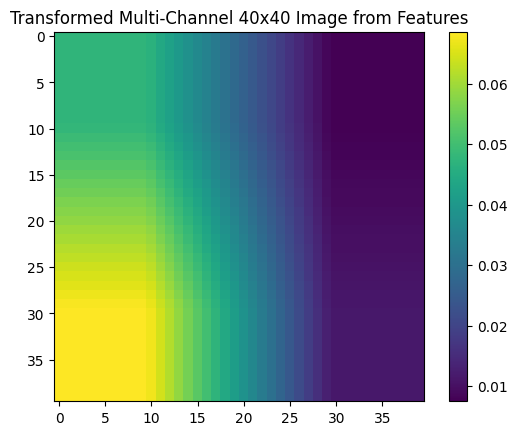

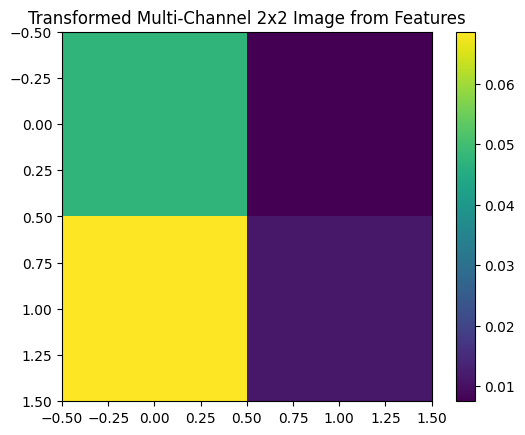

In [7]:
# Function to create multi-channel image
def large_create_multi_channel_image(row):
    delta_phi = np.abs(row['phi1'] - row['phi2'])
    delta_eta = np.abs(row['eta1'] - row['eta2'])
    delta_R = np.sqrt(delta_phi**2 + delta_eta**2)
    invariant_mass = np.sqrt(2 * row['pt1'] * row['pt2'] * (np.cosh(delta_eta) - np.cos(delta_phi)))
    
    channel_1 = np.array([[row['pt1'], row['pt2']], [row['E1'], row['E2']]])
    channel_2 = np.array([[row['eta1'], row['eta2']], [row['phi1'], row['phi2']]])
    channel_3 = np.array([[delta_phi, delta_eta], [delta_R, 0]])
    
    image = np.stack((channel_1, channel_2, channel_3), axis=-1)
    large_image = tf.image.resize(image, [40, 40])  # image resize here
    
    return large_image.numpy().astype(float)


# Function to create multi-channel image
def small_create_multi_channel_image(row):
    delta_phi = np.abs(row['phi1'] - row['phi2'])
    delta_eta = np.abs(row['eta1'] - row['eta2'])
    delta_R = np.sqrt(delta_phi**2 + delta_eta**2)
    invariant_mass = np.sqrt(2 * row['pt1'] * row['pt2'] * (np.cosh(delta_eta) - np.cos(delta_phi)))
    
    channel_1 = np.array([[row['pt1'], row['pt2']], [row['E1'], row['E2']]])
    channel_2 = np.array([[row['eta1'], row['eta2']], [row['phi1'], row['phi2']]])
    channel_3 = np.array([[delta_phi, delta_eta], [delta_R, 0]])
    
    image = np.stack((channel_1, channel_2, channel_3), axis=-1)
    large_image = tf.image.resize(image, [2, 2])  # image resize here
    
    return large_image.numpy().astype(float)

# Apply the function to each row to create images
df['large_image'] = df.apply(large_create_multi_channel_image, axis=1)

# Apply the function to each row to create images
df['image'] = df.apply(small_create_multi_channel_image, axis=1)

import matplotlib.pyplot as plt
# Display an example image for the first channel (e.g., transverse momentum and invariant mass)
plt.imshow(df['large_image'].iloc[0][:, :, 0], cmap='viridis')  # Display the first channel
plt.colorbar()
plt.title('Transformed Multi-Channel 40x40 Image from Features')
plt.show()

# Display an example image for the first channel (e.g., transverse momentum and invariant mass)
plt.imshow(df['image'].iloc[0][:, :, 0], cmap='viridis')  # Display the first channel
plt.colorbar()
plt.title('Transformed Multi-Channel 2x2 Image from Features')
plt.show()

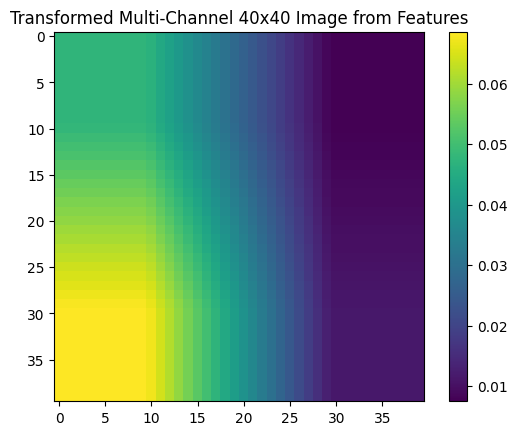

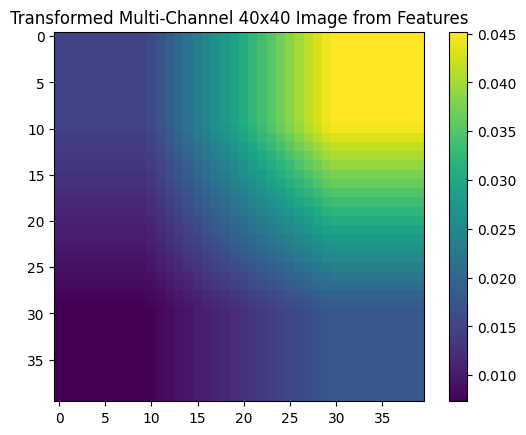

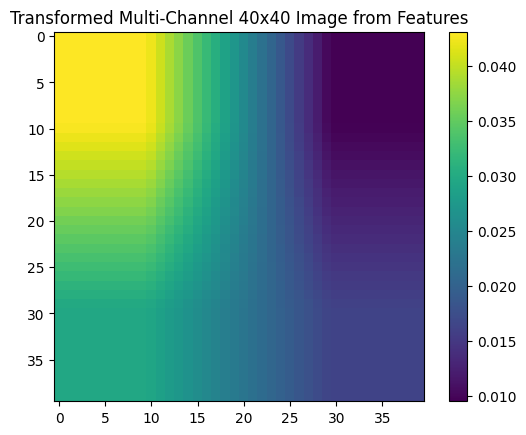

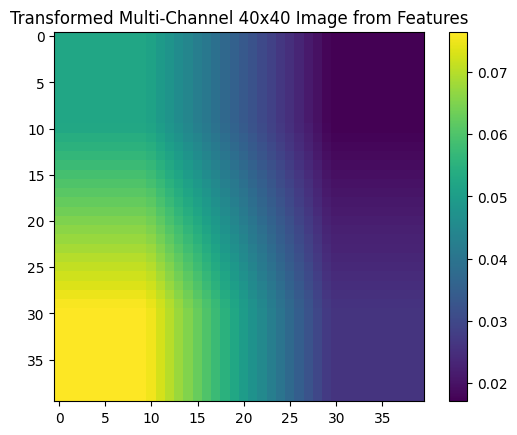

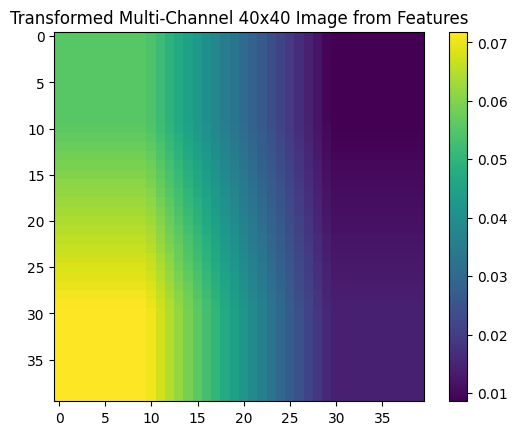

In [8]:
# Display an example image for the first channel 
for i in range(0,5):
    plt.imshow(df['large_image'].iloc[i][:,:,0], cmap='viridis')  # Display the first channel
    plt.colorbar()
    plt.title('Transformed Multi-Channel 40x40 Image from Features')
    plt.show()

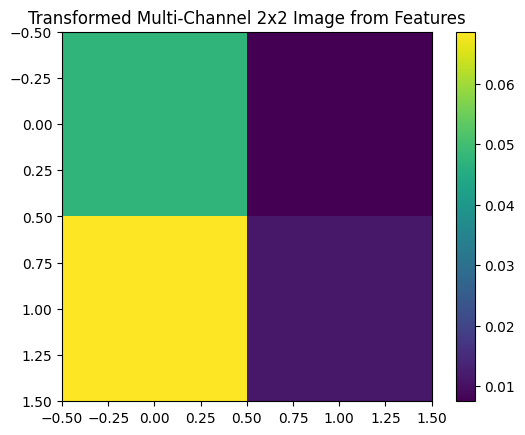

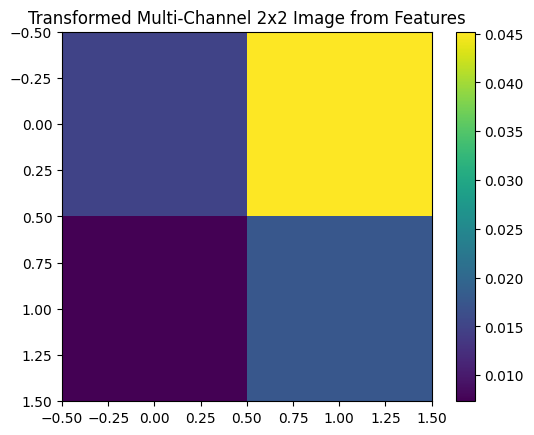

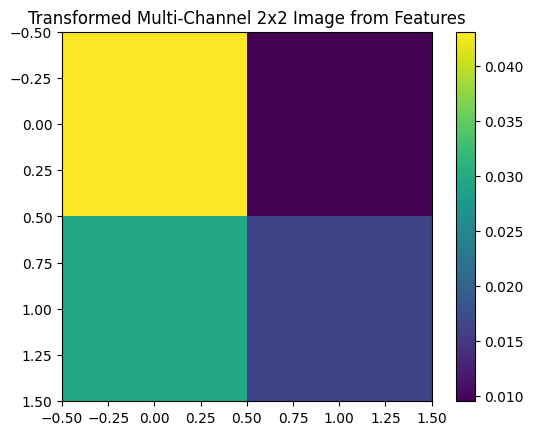

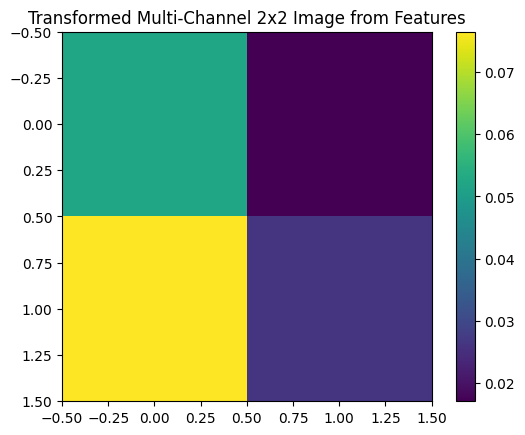

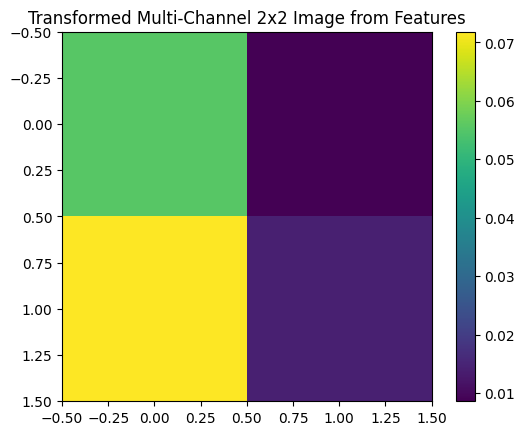

In [9]:
# Display an example image for the first channel (e.g., transverse momentum and invariant mass)
for i in range(0,5):
    plt.imshow(df['image'].iloc[i][:,:,0], cmap='viridis')  # Display the first channel
    plt.colorbar()
    plt.title('Transformed Multi-Channel 2x2 Image from Features')
    plt.show()

## Building and Training the Convolutional Neural Network (CNN)
In this section, we construct and train a Convolutional Neural Network (CNN) to predict the invariant mass of dielectron events using the generated multi-channel images.

### First we convert the images into a Tensorflow object

In [10]:
# Convert DataFrame to TensorFlow Dataset
def create_dataset(df, pix_type):
    images = np.stack(df[pix_type].values)
    labels = df[target].values
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.shuffle(buffer_size=1000).batch(64).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

train_dataset_small = create_dataset(df, 'image')
train_dataset_big = create_dataset(df, 'large_image')

### Convolutional Neural Network (CNN) Architecture and Training
### For (40x40x3) Large Resized Image

This section details the CNN architecture designed to predict the invariant mass from the transformed multi-channel images. The network is implemented using TensorFlow and Keras.

**Model Architecture:**
- **Input Layer:** 
  - Accepts 40x40 pixel images with 3 channels.
  
- **Convolutional Layers:**
  - **Conv2D (32 filters, 3x3 kernel, `relu` activation):** 
    - Extracts low-level features from the input images.
    
  - **BatchNormalization():**
       - Normalize the Activations for faster converging    
    
  - **MaxPooling2D (2x2 pool size):** 
    - Reduces the spatial dimensions by half, helping to downsample the feature maps.
  - **Conv2D (64 filters, 3x3 kernel, `relu` activation):** 
    - Captures more complex patterns.
    
  - **BatchNormalization():**
       - Normalize the Activations for faster converging

  - **MaxPooling2D (2x2 pool size):** 
    - Further reduces the spatial dimensions.
  - **Conv2D (64 filters, 3x3 kernel, `relu` activation):** 
    - Further refines feature extraction.

- **Fully Connected Layers:**
  - **Flatten Layer:** 
    - Transforms the 3D feature maps into 1D feature vectors.
  - **Dense Layer (64 units, `relu` activation):** 
    - Learns higher-level representations.
  - **Output Layer (1 unit):** 
    - Predicts the invariant mass as a single continuous value.

**Model Compilation:**
- **Optimizer:** Adam with a learning rate of 0.0001.
- **Loss Function:** Mean Squared Error (MSE) for regression.
- **Metric:** Mean Absolute Error (MAE) to evaluate performance.

**Training and Evaluation:**
- The model is trained for 10 epochs using the prepared dataset.
- The final loss and MAE are computed to assess the model’s performance on predicting the invariant mass.

In [11]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history2 = model.fit(train_dataset_big, epochs=10)



Epoch 1/10


I0000 00:00:1725814683.395913     108 service.cc:145] XLA service 0x7a9a0c027a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725814683.395961     108 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725814683.395966     108 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  35/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1025.8029 - mae: 22.5980  

I0000 00:00:1725814687.995033     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 170.6104 - mae: 7.5118
Epoch 2/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 15.5067 - mae: 2.6987
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 11.5026 - mae: 2.2927
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 9.3692 - mae: 2.0863
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 8.1863 - mae: 1.9490
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 6.7939 - mae: 1.7719
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 5.8496 - mae: 1.6501
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 5.3200 - mae: 1.5848
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 4.7006 - mae: 1.4850
Epoch 10/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 4.3181 - mae: 1.4326


In [12]:
# Evaluate the model
loss, mae = model.evaluate(train_dataset_big)
print(f'Loss: {loss}, MAE: {mae}')

1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1224 - mae: 1.0056
Loss: 2.1419548988342285, MAE: 1.0075937509536743


### Convolutional Neural Network (CNN) Architecture and Training
### For (2x2x3) Original Image

This section details the CNN architecture designed to predict the invariant mass from the transformed multi-channel images. The network is implemented using TensorFlow and Keras.

**Model Architecture:**
- **Input Layer:** 
  - Accepts 2x2 pixel images with 3 channels.
  
- **Convolutional Layers:**
  - **Conv2D (32 filters, 2x2 kernel, `relu` activation):** 
    - Use a 2x2 kernel to preserve spatial size
    - Extracts low-level features from the input images.
    
  - **BatchNormalization():**
       - Normalize the Activations for faster converging
       
  - **Conv2D (64 filters, 2x2 kernel, `relu` activation):** 
     - Use a 2x2 kernel to preserve spatial size
     - Extracts low-level features from the input images.
     
  - **BatchNormalization():**
       - Normalize the Activations for faster converging
       
  - **GlobalAveragePooling2D():**
      - Compress the Spacial Information
      
    **We Dont use any local pooling layers since pooling on such small images will reduce dimensions too much**
    
- **Fully Connected Layers:**
  - **Flatten Layer:** 
    - Transforms the 3D feature maps into 1D feature vectors.
  - **Dense Layer (64 units, `relu` activation):** 
    - Learns higher-level representations.
  - **Output Layer (1 unit):** 
    - Predicts the invariant mass as a single continuous value.

**Model Compilation:**
- **Optimizer:** Adam with a learning rate of 0.0001.
- **Loss Function:** Mean Squared Error (MSE) for regression.
- **Metric:** Mean Absolute Error (MAE) to evaluate performance.

**Training and Evaluation:**
- The model is trained for 10 epochs using the prepared dataset.
- The final loss and MAE are computed to assess the model’s performance on predicting the invariant mass.

In [13]:
# Define the optimizer
opt = Adam(learning_rate=0.0001)

# Define the adjusted model
model = Sequential([
     Conv2D(32, (2, 2), activation='relu', padding='same', input_shape=(2, 2, 3)), 
     BatchNormalization(), # Normalize the activations
     Conv2D(64, (2, 2), activation='relu', padding='same'), 
     BatchNormalization(),
     GlobalAveragePooling2D(), 
     Dense(64, activation='relu'),  
     Dense(1)   
])

# Compile the model
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(train_dataset_small, epochs=10)

# Evaluate the model
loss, mae = model.evaluate(train_dataset_small)
print(f'Loss: {loss}, MAE: {mae}')


Epoch 1/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1077.1189 - mae: 23.6304
Epoch 2/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 126.5513 - mae: 8.1477
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 61.4818 - mae: 5.6455
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 41.6317 - mae: 4.6317
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.8145 - mae: 3.9599
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 26.0506 - mae: 3.6426
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22.4273 - mae: 3.3927
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20.6973 - mae: 3.2770
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 19.4889 - mae: 3.1974
Epoch 10/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 17.9859 - mae: 3.0711
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 11.4327 - mae: 2.4998
Loss: 11.320267677307129, MAE: 2.491309404373169


## Test 2: Fully Connected Deep Neural Network (MLP)

In [29]:
### DNN
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Drop irrelevant columns and split into features and target
df2 = data.drop(['Run', 'Event'], axis=1)
X = df2.drop('M', axis=1).values
y = df2['M'].values

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Definition and Training

In this section, we define, compile, and train a deep neural network (DNN) for regression tasks. The code is implemented using TensorFlow and Keras libraries.

#### Model Definition

We use the `Sequential` model from Keras to build our neural network, which consists of the following layers:

1. **Input Layer**:
   - `Dense(128, activation='relu', input_shape=(X_train.shape[1],))`
   - A dense layer with 128 units and ReLU (Rectified Linear Unit) activation function. The `input_shape` is specified to match the feature dimension of the training data.

2. **Hidden Layer**:
   - `Dense(64, activation='relu')`
   - A dense layer with 64 units and ReLU activation function. This layer introduces non-linearity to the model.
   
3. **Hidden Layer**:
   - `Dense(32, activation='relu')`
   - A dense layer with 32 units and ReLU activation function. This layer introduces non-linearity to the model.

4. **Output Layer**:
   - `Dense(1)`
   - A dense layer with a single unit, without an activation function, suitable for regression tasks where the output is a continuous value.

#### Model Compilation

The model is compiled with the following settings:
- **Optimizer**: Adam with a learning rate of 0.001, which adjusts the weights of the network based on the gradient of the loss function.
- **Loss Function**: Mean Squared Error (MSE), commonly used for regression tasks to measure the average squared difference between predicted and actual values.
- **Metrics**: Mean Absolute Error (MAE) to evaluate the average magnitude of errors in predictions.

```python
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mae'])


In [15]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1)  # Output layer with no activation function for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history3 = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_data=(X_val, y_val))

# Print training history
print("Training complete. Training history:", history2.history)


Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1404.8469 - mae: 29.6793 - val_loss: 1089.7208 - val_mae: 28.8038
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1002.6251 - mae: 27.7550 - val_loss: 765.7622 - val_mae: 25.5913
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 721.6588 - mae: 24.7012 - val_loss: 469.4057 - val_mae: 20.3998
Epoch 4/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 504.2637 - mae: 20.9754 - val_loss: 339.4942 - val_mae: 17.6039
Epoch 5/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 323.4005 - mae: 16.6108 - val_loss: 187.7106 - val_mae: 12.8256
Epoch 6/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 181.9196 - mae: 11.9780 - val_loss: 76.6665 - val_mae: 7.8437
Epoch 7/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 89.9559 - mae: 7.8090 - val_loss: 32.0264 - val_mae: 4.5498
Epoch 8/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 51.8391 - mae: 5.4030 - val_loss: 20.4480 - val_mae: 3.2686

In [16]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_train)

# Step 2: Calculate the R-squared score
r2 = r2_score(y_train, y_pred)
print(f'R2 Score: {r2}')

2498/2498 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
R2 Score: 0.9742098143226501


## Comparing The Performance of CNN vs DNN for invariant mass prediction

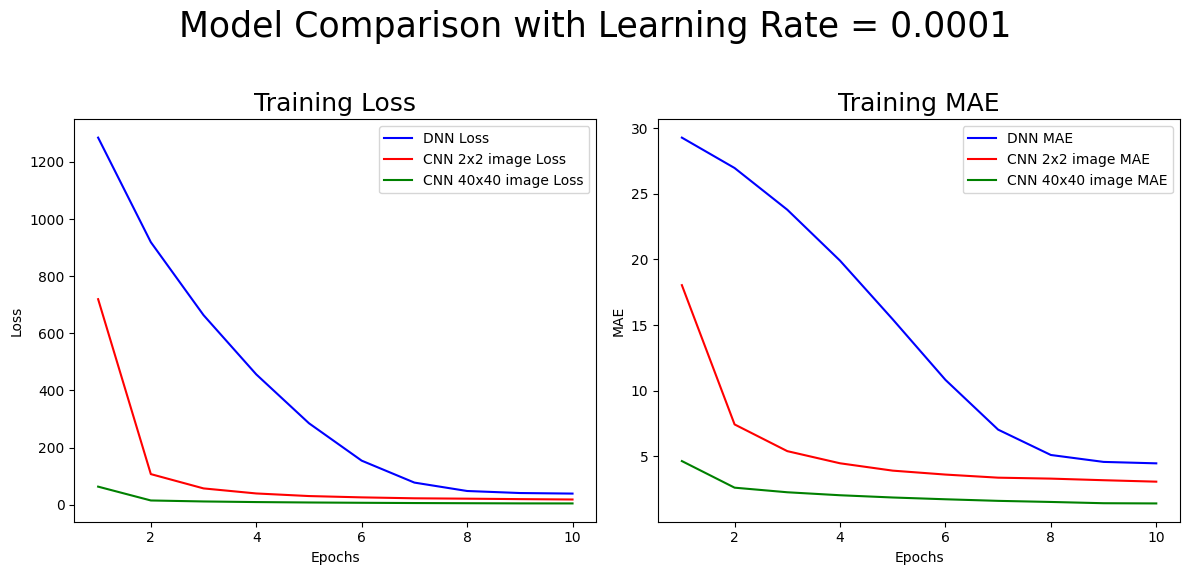

In [17]:
import matplotlib.pyplot as plt

# Extract metrics from history
dnn_loss = history3.history['loss']
dnn_mae = history3.history['mae']

cnn_small_loss = history.history['loss']
cnn_small_mae = history.history['mae']

cnn_big_loss = history2.history['loss']
cnn_big_mae = history2.history['mae']

# Number of epochs
epochs_dnn = range(1, len(dnn_loss) + 1)
epochs_cnn = range(1, len(cnn_small_loss) + 1)

# Plotting Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_dnn, dnn_loss, 'b-', label='DNN Loss')
plt.plot(epochs_cnn, cnn_small_loss, 'r-', label='CNN 2x2 image Loss')
plt.plot(epochs_cnn, cnn_big_loss, 'g-', label='CNN 40x40 image Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss', fontsize=18)
plt.legend()

# Plotting MAE
plt.subplot(1, 2, 2)
plt.plot(epochs_dnn, dnn_mae, 'b-', label='DNN MAE')
plt.plot(epochs_cnn, cnn_small_mae, 'r-', label='CNN 2x2 image MAE')
plt.plot(epochs_cnn, cnn_big_mae, 'g-', label='CNN 40x40 image MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training MAE', fontsize=18)
plt.legend()

# Adding the mega title
plt.suptitle('Model Comparison with Learning Rate = 0.0001', fontsize=25)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for suptitle
plt.show()

### Results Comparison: CNN vs. DNN with Image Resizing Impact

In this study, we compared the performance of Convolutional Neural Networks (CNNs) with different image sizes and a Deep Neural Network (DNN) on a regression task using a dataset of dielectron events. Both models were trained for 10 epochs, and their performance was assessed based on loss and Mean Absolute Error (MAE).

**Performance Metrics:**

- **Small CNN (2x2 image implementation):**
  - **Loss:** 11.3202   
  - **Mean Absolute Error (MAE):** 2.4913

- **Large CNN (40x40 image implementation):**
  - **Loss:** 2.1419   
  - **Mean Absolute Error (MAE):** 1.0075

- **DNN:**
  - **Loss:** 38.7507   
  - **Mean Absolute Error (MAE):** 4.4650

**Observations and Interpretations:**

From the results, it is evident that the CNN with the larger image implementation (40x40) outperforms both the small CNN (2x2) and the DNN in terms of loss and MAE. This suggests that the larger CNN is more effective at capturing the underlying patterns and relationships in the data, leading to better predictive performance. 

#### Analysis of Image Resizing and Its Impact:

The choice of image size plays a crucial role in the performance of CNNs:

- **2x2 Image Implementation:**
  - **Pros:** The smaller image size preserves the original tabular structure and results in faster computation and reduced risk of overfitting due to the model’s simplicity.
  - **Cons:** The limited spatial dimensions restrict the CNN’s ability to extract meaningful features, leading to potential underfitting, as evidenced by the higher loss and MAE values compared to the larger image implementation.

- **40x40 Image Implementation:**
  - **Pros:** The larger image size allows the network to effectively apply convolutional layers, learning richer spatial features and reducing information loss during convolution operations. This translates to significantly improved performance metrics.
  - **Cons:** However, the resizing process introduces interpolation, which can lead to information loss if additional pixels do not represent meaningful features. Additionally, the larger image size increases computation costs and training time, with a higher risk of overfitting if not properly managed.

#### Comparative Performance:

- **CNN vs. DNN:** The CNN architectures, particularly the large image implementation, demonstrated superior performance over the DNN, highlighting CNN's strength in capturing spatial hierarchies and patterns in image data, which the DNN struggles with.
- **Training Efficiency:** The training curves for the CNNs showed faster convergence and lower loss/MAE values compared to the DNN, indicating that CNNs are not only more accurate but also more efficient in learning from the data.

**Conclusion:**

While resizing to a larger 40x40 image size significantly enhances the CNN's ability to learn from the data, this benefit comes with trade-offs, such as increased computational demands and the potential for information loss due to interpolation. The choice between different image sizes and model architectures should therefore be carefully evaluated based on the specific goals and constraints of the analysis.


### Discussion on "Information" Loss and GNNs

The goal of this study was to investigate the effectiveness of using image-based representations of data and compare it with traditional approaches. The results highlight a crucial aspect of machine learning in particle physics: **information loss** in data representation.

#### Information Loss in Image Representations

In particle physics, data from detectors can be sparse and irregular, making it challenging to represent them as fixed grids or images. For instance, CNNs were used to process image representations of calorimeter data from the ATLAS detector to classify particle jets. However, the inherent irregularity of the data and the potential loss of information due to projection into a fixed grid can limit the performance of CNNs.

#### Why GNNs are Optimal

Graph Neural Networks (GNNs) offer a more natural and effective approach for handling particle physics data:

1. **Natural Representation**:
   - Particle physics data can be represented as graphs, where nodes correspond to detector hits or particles, and edges represent the relationships between them. This representation captures the inherent irregularity and sparsity of the data more accurately than fixed grids or images.

2. **Preservation of Information**:
   - GNNs are designed to work with graph-structured data, allowing them to learn and predict complex relationships between nodes without imposing artificial constraints. This results in better preservation of information and more accurate predictions.

3. **Versatility**:
   - GNNs have been successfully applied to various particle physics tasks such as jet classification, particle tracking, and event classification. They excel in capturing the interactions and relationships between different particles or detector hits, making them well-suited for complex analyses.

In conclusion, while CNNs have shown superior performance in this comparison, the information loss inherent in image-based representations underscores the need for more advanced methods. GNNs, with their ability to naturally handle graph-based data, present a promising alternative for addressing the challenges associated with sparse and irregular data in particle physics.



## Testing BDT Regressors for Performance Comparison

In this section, we test two tree-based regression algorithms, AdaBoost and XGBoost, to compare their performance with the previously implemented Deep Learning (DL) architectures. The goal is to evaluate how these traditional Boosted Decision Tree (BDT) models perform on our dataset, particularly in predicting the continuous target variable `M`.

#### 1. **AdaBoost (Adaptive Boosting):**

- **Boosting Technique:** AdaBoost is one of the earliest boosting algorithms developed. It combines multiple weak learners (typically decision trees) into a single strong learner in a sequential manner. Each learner is trained to correct the errors of its predecessor.
  
- **How It Works:** 
  - Assigns weights to each data point, initially giving equal weights.
  - Increases the weights of the data points that were mispredicted by the previous model, forcing the next model to focus more on these difficult cases.
  - The final prediction is a weighted sum of the predictions from all learners.

- **Key Characteristics:**
  - **Not Gradient Boosted:** AdaBoost doesn’t use gradient descent; instead, it adjusts weights based on the performance of each weak learner.
  - **Weak Learners:** Commonly uses shallow decision trees (often stumps with a single split) as weak learners.
  - **Sensitivity to Outliers:** Can be sensitive to noisy data and outliers, as these points get higher weights with each boosting iteration.

- **Use Cases:** Suitable for scenarios where simpler models are desired, but can become unstable with noisy data due to its focus on correcting errors iteratively.

#### 2. **XGBoost (Extreme Gradient Boosting):**

- **Boosting Technique:** XGBoost is an implementation of gradient boosting optimized for speed and performance. It builds additive models sequentially, with each model correcting the errors of the combined model up to that point.

- **How It Works:**
  - Uses gradient descent to minimize the loss function, making it a gradient boosting method.
  - Each new tree is fitted to the residuals (errors) of the previous trees, using gradients to identify the direction of the correction needed.
  - Adds regularization terms (like L1 and L2) to the loss function to reduce overfitting and improve generalization.

- **Key Characteristics:**
  - **Gradient Boosted:** Optimizes the loss function using gradients, which makes it highly effective for complex, non-linear relationships.
  - **Regularization:** Includes L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting.
  - **Optimized for Speed:** Uses enhancements such as parallel processing, tree pruning, and hardware optimization to make it faster than other gradient boosting algorithms.

- **Use Cases:** Extremely powerful for large datasets and complex problems where high accuracy is crucial, commonly used in data science competitions and practical applications requiring precise predictions.


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Assuming your data is loaded in a DataFrame named 'df'
# Dropping the 'Run' and 'Event' columns as they are not useful
df2 = data.drop(['Run', 'Event'], axis=1)

# Separating features and target variable
X = df2.drop('M', axis=1)  # Features
y = df2['M']               # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the regressors
adaboost_reg = AdaBoostRegressor(n_estimators=100, random_state=42)
xgboost_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Training AdaBoost regressor
adaboost_reg.fit(X_train, y_train)
y_pred_adaboost = adaboost_reg.predict(X_test)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)

# Training XGBoost regressor
xgboost_reg.fit(X_train, y_train)
y_pred_xgboost = xgboost_reg.predict(X_test)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)

# Printing the Mean Absolute Errors for comparison
print(f"Mean Absolute Error (MAE) of AdaBoost Regressor: {mae_adaboost:.4f}")
print(f"Mean Absolute Error (MAE) of XGBoost Regressor: {mae_xgboost:.4f}")

# Optional: Combine all results for a detailed comparison
results = {
    'Model': ['AdaBoost', 'XGBoost'],
    'MAE': [mae_adaboost, mae_xgboost]
}

# Display the results in a DataFrame for easier comparison
results_df = pd.DataFrame(results)
print(results_df)


Mean Absolute Error (MAE) of AdaBoost Regressor: 14.6333
Mean Absolute Error (MAE) of XGBoost Regressor: 9.1665
      Model        MAE
0  AdaBoost  14.633293
1   XGBoost   9.166524


### Evaluation of Results:

The performance of the AdaBoost and XGBoost regressors was evaluated using Mean Absolute Error (MAE). Below are the results:

- **Mean Absolute Error (MAE) of AdaBoost Regressor:** 14.6333
- **Mean Absolute Error (MAE) of XGBoost Regressor:** 9.1665

| Model     | MAE      |
|-----------|----------|
| AdaBoost  | 14.6333  |
| XGBoost   | 9.1665   |

**Observations:**

From the results, it is evident that the XGBoost regressor outperforms the AdaBoost regressor, achieving a lower MAE. This indicates that XGBoost is more effective in capturing the underlying patterns and relationships in the data, leading to better predictive performance. The inclusion of gradient boosting and regularization techniques likely contributes to its superior performance over AdaBoost, which does not utilize gradients for optimization.

These findings suggest that while both tree-based methods provide valuable insights, XGBoost offers a more robust approach, especially when compared to more traditional boosting techniques like AdaBoost. This aligns well with our earlier observations with Deep Learning architectures, showcasing the strength of advanced boosting methods in regression tasks.



## Testing a Hadronic Image Representation of Data

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from skimage.transform import resize
from PIL import Image
import io

# Function to create an image from delta_phi and delta_eta
def create_image(delta_eta, delta_phi, grid_size):
    # Define range for the image
    eta_range = (-np.pi, np.pi)
    phi_range = (-np.pi, np.pi)

    # Create a 2D histogram with single data point
    hist = np.zeros((grid_size, grid_size))
    
    # Convert delta_eta and delta_phi to indices
    eta_idx = int((delta_eta - eta_range[0]) / (eta_range[1] - eta_range[0]) * (grid_size - 1))
    phi_idx = int((delta_phi - phi_range[0]) / (phi_range[1] - phi_range[0]) * (grid_size - 1))

    # Set the histogram value for the position corresponding to delta_eta and delta_phi
    if 0 <= eta_idx < grid_size and 0 <= phi_idx < grid_size:
        hist[eta_idx, phi_idx] = 1

    # Normalize the histogram values to the range [0, 1]
    hist_normalized = hist / hist.max() if hist.max() > 0 else hist

    # Resize the histogram to ensure it is exactly 40x40
    image_resized = resize(hist_normalized, (grid_size, grid_size), mode='reflect', anti_aliasing=True)

    # Convert to image format
    image = Image.fromarray((image_resized * 255).astype(np.uint8))  # Convert to 8-bit grayscale image
    return image

# Function to process each row and create image
def process_row(row):
    delta_eta = row['eta1'] - row['eta2']
    delta_phi = row['phi1'] - row['phi2']
    M = row['M']
    
    # Create image
    img = create_image(delta_eta, delta_phi, grid_size=40)
    # Convert image to binary format
    buffer = io.BytesIO()
    img.save(buffer, format='PNG')
    img_bytes = buffer.getvalue()
    
    return img_bytes, M

# Create lists to store image bytes and M values
images = []
target_values = []

# Apply the function to each row in the DataFrame
for _, row in data.iterrows():
    img_bytes, M = process_row(row)
    img_bytes2, M = process_row_small(row)
    images.append(img_bytes)
    images_small.append(img_bytes2)
    target_values.append(M)

# Create new DataFrame
df2 = pd.DataFrame({
    'Image': images,
    'M': target_values
})

# Save DataFrame to a CSV file (optional)
# df2.to_csv('path_to_save_df2.csv', index=False)

# Display the DataFrame (for verification)
print(df2.head())


                                               Image         M
0  b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...   8.94841
1  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...  15.89300
2  b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...  38.38770
3  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...   3.72862
4  b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...   2.74718


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import io

# Function to convert PNG bytes to a NumPy array
def png_bytes_to_array(png_bytes):
    buffer = io.BytesIO(png_bytes)
    img = Image.open(buffer)
    return np.array(img)

# Convert images in df2 to NumPy arrays
df2['Image_array'] = df2['Image'].apply(png_bytes_to_array)


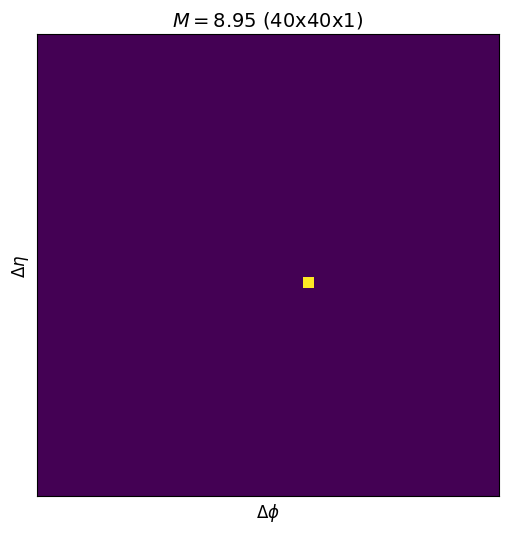

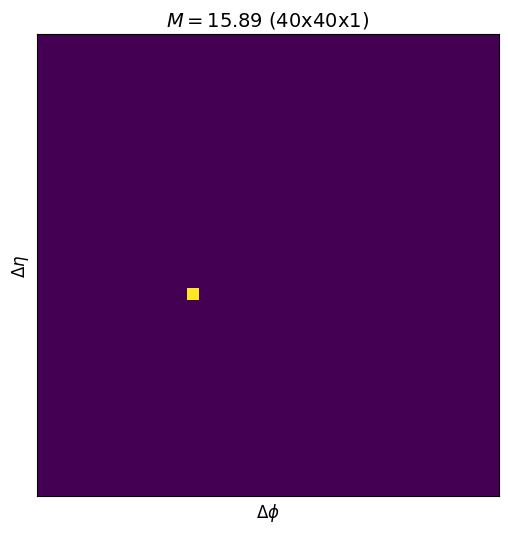

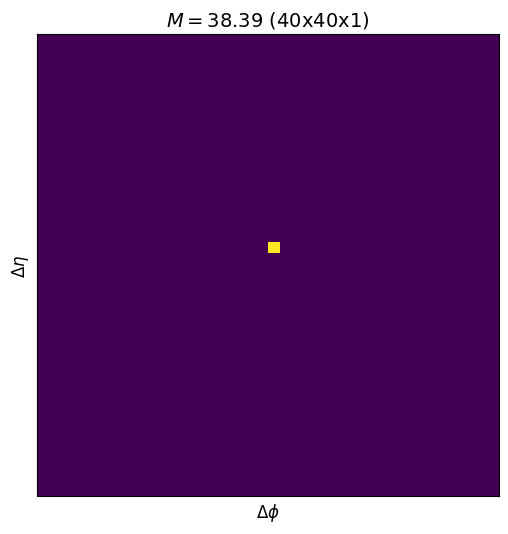

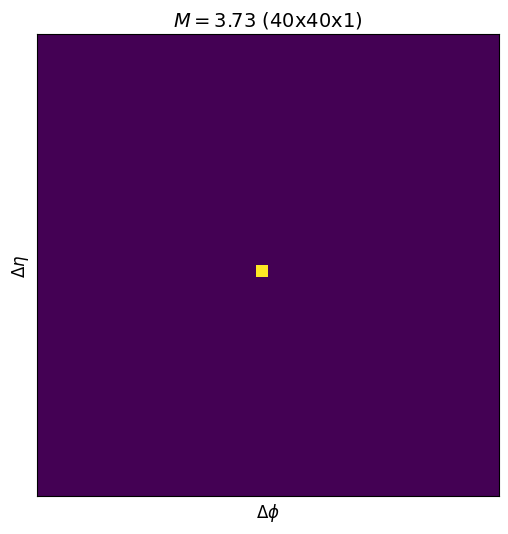

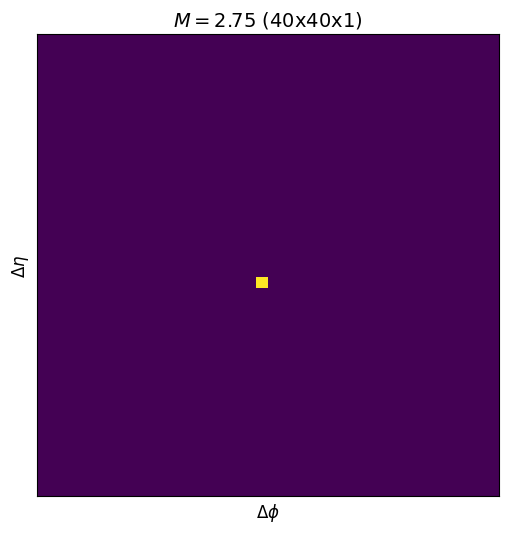

In [38]:
# Display the first 5 images large
for i in range(5):
    # Get image array from DataFrame
    img_array = df2['Image_array'].iloc[i]
    
    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img_array, cmap='viridis', origin='lower')
    
    # Set title with invariant mass 'M'
    M_value = df2['M'].iloc[i]
    plt.title(f'$M = {M_value:.2f}$ (40x40x1)', fontsize=14)
    
    # Set axis labels
    plt.xlabel('$\\Delta \\phi$', fontsize=12)
    plt.ylabel('$\\Delta \\eta$', fontsize=12)
    
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])
    
    # Show the plot
    plt.show()


**Over here the Hadronic Representaion of data is very spasrse as there is not much data per event to begin with. In this scenario this type of representation of data is rendered inefficient**

In [39]:
df2 = df2.drop('Image', axis=1)

In [40]:
df2['Image_array'][0].shape

(40, 40)

In [41]:
df2

,M,Image_array
0,8.94841,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,15.89300,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,38.38770,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3.72862,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,2.74718,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...
99910,8.44779,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
99911,20.71540,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
99912,12.71350,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
99913,4.69670,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


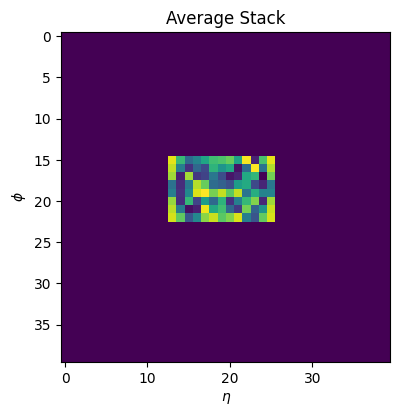

In [42]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(np.sum(df2['Image_array'], axis=0))
plt.title("Average Stack")
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")


plt.tight_layout()
plt.show()

In [26]:
train_dataset_img2 = create_dataset(df2, 'Image_array')
train_dataset_img2

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 40, 40), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [30]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history4 = model.fit(train_dataset_img2, epochs=10)



Epoch 1/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 386.4481 - mae: 13.4692
Epoch 2/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 354.9230 - mae: 12.8427
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 353.7472 - mae: 12.7994
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 353.7424 - mae: 12.8071
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 352.5906 - mae: 12.7959
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 351.9198 - mae: 12.7578
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 352.5004 - mae: 12.7735
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 351.1061 - mae: 12.7483
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 352.4811 - mae: 12.7837
Epoch 10/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 351.7406 - mae: 12.7636


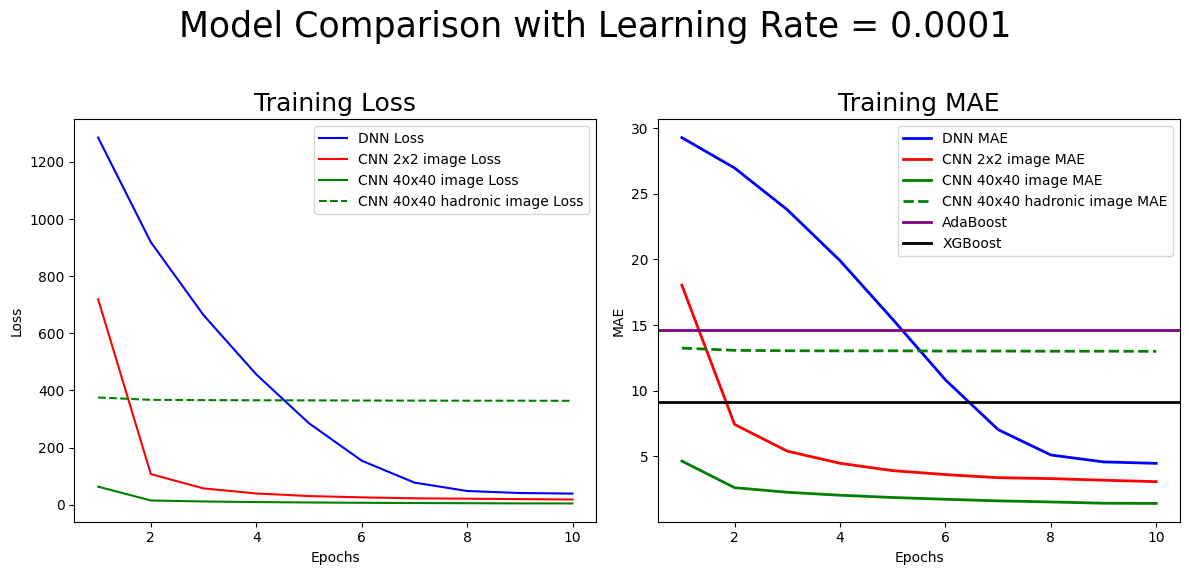

In [32]:
import matplotlib.pyplot as plt

# Extract metrics from history
dnn_loss = history3.history['loss']
dnn_mae = history3.history['mae']

cnn_small_loss = history.history['loss']
cnn_small_mae = history.history['mae']

cnn_big_loss = history2.history['loss']
cnn_big_mae = history2.history['mae']

cnn_img2_loss = history4.history['loss']
cnn_img2_mae = history4.history['mae']

# Number of epochs
epochs_dnn = range(1, len(dnn_loss) + 1)
epochs_cnn = range(1, len(cnn_small_loss) + 1)

# Plotting Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_dnn, dnn_loss, 'b-', label='DNN Loss')
plt.plot(epochs_cnn, cnn_small_loss, 'r-', label='CNN 2x2 image Loss')
plt.plot(epochs_cnn, cnn_big_loss, 'g-', label='CNN 40x40 image Loss')
plt.plot(epochs_cnn, cnn_img2_loss, 'g--', label='CNN 40x40 hadronic image Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss', fontsize=18)
plt.legend()

# Plotting MAE
plt.subplot(1, 2, 2)
plt.plot(epochs_dnn, dnn_mae, 'b-', linewidth=2, label='DNN MAE')
plt.plot(epochs_cnn, cnn_small_mae, 'r-', linewidth=2, label='CNN 2x2 image MAE')
plt.plot(epochs_cnn, cnn_big_mae, 'g-', linewidth=2, label='CNN 40x40 image MAE')
plt.plot(epochs_cnn, cnn_img2_mae, 'g--', linewidth=2, label='CNN 40x40 hadronic image MAE')
plt.axhline(y=14.6333, color='purple', linestyle='-', linewidth=2, label='AdaBoost')
plt.axhline(y=9.1665, color='black', linestyle='-', linewidth=2, label='XGBoost')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training MAE', fontsize=18)
plt.legend()

# Adding the mega title
plt.suptitle('Model Comparison with Learning Rate = 0.0001', fontsize=25)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for suptitle
plt.show()

## Appendix: A Better Implementation of the Tree Based Models


```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


df2 = data.drop(['Run', 'Event'], axis=1)
# Separating features and target variable
X = df2.drop('M', axis=1)  # Features
y = df2['M']               # Target

# Define regressors
regressors = {
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'GBDT': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# To store results
mae_scores = {}
r2_scores = {}
y_preds = {}

# K-Fold cross-validation
for name, model in regressors.items():
    mae_fold = []
    r2_fold = []
    y_pred_all = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Training the model
        model.fit(X_train, y_train)
        
        # Predicting
        y_pred = model.predict(X_test)
        y_pred_all.append(y_pred)
        
        # Calculate MAE and R² for the fold
        mae_fold.append(mean_absolute_error(y_test, y_pred))
        r2_fold.append(r2_score(y_test, y_pred))
    
    # Store average MAE and R² scores
    mae_scores[name] = np.mean(mae_fold)
    r2_scores[name] = np.mean(r2_fold)
    y_preds[name] = np.concatenate(y_pred_all)

# Printing MAE and R² for each model
for name in regressors:
    print(f"{name} MAE: {mae_scores[name]:.2f}, R²: {r2_scores[name]:.2f}")

# Plotting histograms of predicted and true invariant mass
plt.figure(figsize=(16, 10))

# Plot for AdaBoost
plt.subplot(2, 2, 1)
sb.histplot(y, bins=50, alpha=0.6, color='g', label='True Invariant Mass', kde=True)
sb.histplot(y_preds['AdaBoost'], bins=50, alpha=0.6, color='b', label='Predicted Invariant Mass', kde=True)
plt.xlabel('Invariant Mass')
plt.ylabel('Number of Events')
plt.title('AdaBoost Regressor Output')
plt.legend()

# Plot for XGBoost
plt.subplot(2, 2, 2)
sb.histplot(y, bins=50, alpha=0.6, color='g', label='True Invariant Mass', kde=True)
sb.histplot(y_preds['XGBoost'], bins=50, alpha=0.6, color='b', label='Predicted Invariant Mass', kde=True)
plt.xlabel('Invariant Mass')
plt.ylabel('Number of Events')
plt.title('XGBoost Regressor Output')
plt.legend()

# Plot for GBDT
plt.subplot(2, 2, 3)
sb.histplot(y, bins=50, alpha=0.6, color='g', label='True Invariant Mass', kde=True)
sb.histplot(y_preds['GBDT'], bins=50, alpha=0.6, color='b', label='Predicted Invariant Mass', kde=True)
plt.xlabel('Invariant Mass')
plt.ylabel('Number of Events')
plt.title('GBDT Regressor Output')
plt.legend()

# Plot for RandomForest
plt.subplot(2, 2, 4)
sb.histplot(y, bins=50, alpha=0.6, color='g', label='True Invariant Mass', kde=True)
sb.histplot(y_preds['RandomForest'], bins=50, alpha=0.6, color='b', label='Predicted Invariant Mass', kde=True)
plt.xlabel('Invariant Mass')
plt.ylabel('Number of Events')
plt.title('Random Forest Regressor Output')
plt.legend()

plt.tight_layout()
plt.show()


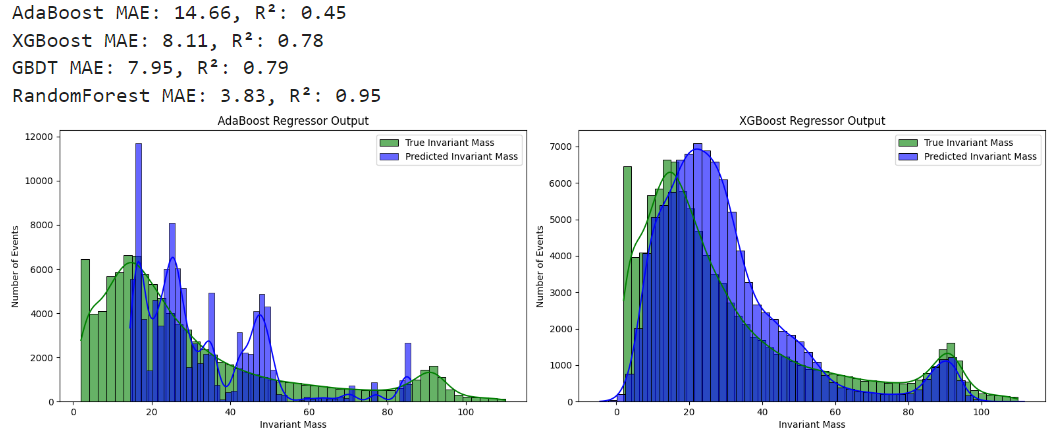
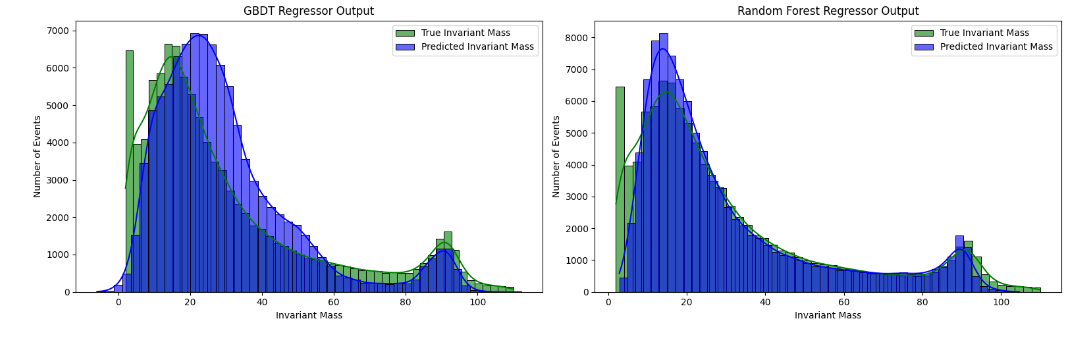